# MRMC Demo on Synthetic Data

In [25]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

%load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
from recourse_methods.mrmc import MRMC
from core.recourse_iterator import RecourseIterator
from data import data_adapter as da
from models.synthetic import SyntheticModel
from core import utils
from visualize.two_d_plots import Display2DPaths

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data and model

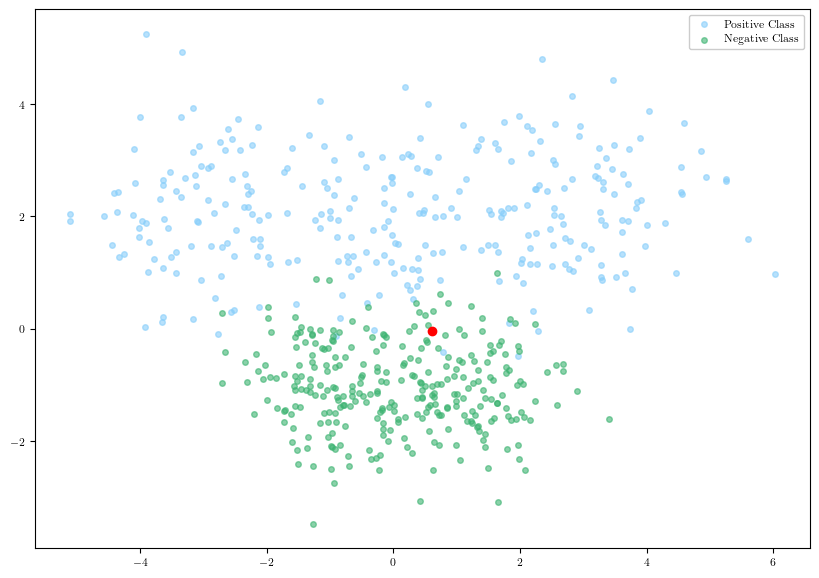

In [214]:
dataset, preprocessor = da.load_synthetic_dataset()
model = SyntheticModel(0.2, 0.5)
poi = da.random_poi(dataset)
display = Display2DPaths(
    dataset.drop('Y', axis=1).to_numpy(),
    dataset['Y'].to_numpy()
).use_small_legend().set_poi(poi).scatter()

## Generate some recourse directions

(<Figure size 1000x700 with 1 Axes>, <AxesSubplot:>)

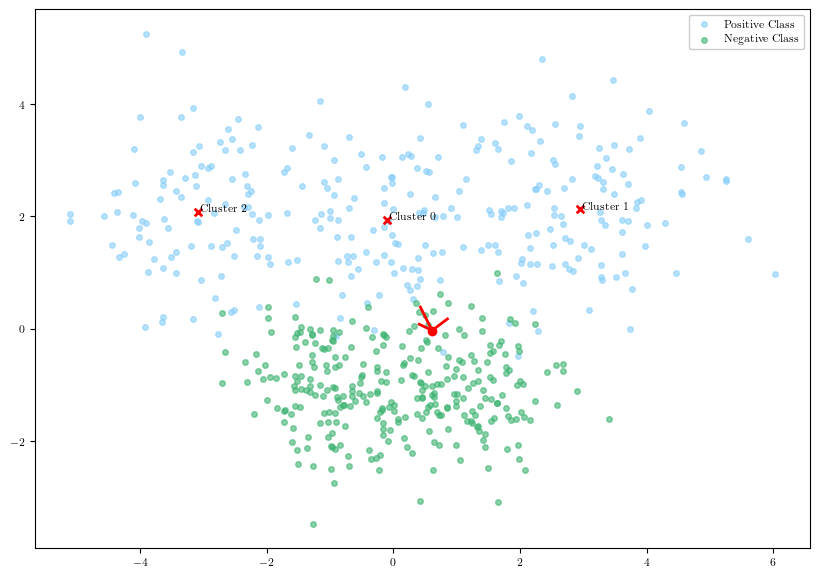

In [216]:
mrmc = MRMC(
    k_directions,
    preprocessor,
    dataset,
    rescale_direction=utils.normalize_rescaler)

dirs = mrmc.get_all_recourse_instructions(poi)

Display2DPaths(
    dataset.drop('Y', axis=1).to_numpy(),
    dataset['Y'].to_numpy()
).use_small_legend().set_poi(poi).set_dirs(dirs).set_clusters(mrmc.clusters.cluster_centers).scatter()

## Generate some paths

(<Figure size 1000x700 with 1 Axes>, <AxesSubplot:>)

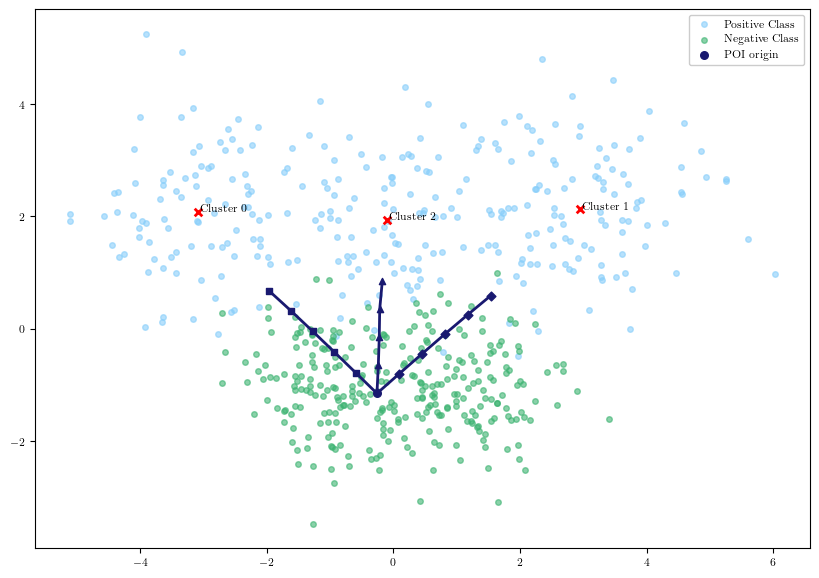

In [217]:
k_directions = 3
mrmc = MRMC(
    k_directions,
    preprocessor,
    dataset,
    rescale_direction=utils.get_constant_step_size_rescaler(step_size=0.5))
poi = da.random_poi(dataset)

iterator = RecourseIterator(
    mrmc,
    preprocessor,
    certainty_cutoff=0.75,
    model=model)
paths = iterator.iterate_k_recourse_paths(poi, 20)

Display2DPaths(
    dataset.drop('Y', axis=1).to_numpy(),
    dataset['Y'].to_numpy()
).use_small_legend().set_paths(paths).set_clusters(mrmc.clusters.cluster_centers).scatter()